# Figure 6 - HD 209458b Multispecies

In [3]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
from wind_ae.wrapper.wrapper_utils.plots import energy_plot

import matplotlib.pyplot as plt
from wind_ae.wrapper.wrapper_utils.plots import _custom_rc_params
import matplotlib.ticker as ticker
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [7]:
sim = wind_sim()
sim.load_uservars('data/HD209_13.6-2000eV_H-He-C-N-O-Ne-Mg.csv')
simh = wind_sim()
simh.load_uservars('data/HD209_13.6-2000eV_H.csv')

         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.


In [ ]:
linestyle=['-', '--', ':', '-.',
            (5, (10, 3)),
            (0, (1, 1)),
            (0, (3, 5, 1, 5, 1, 5)),
            (5, (10, 3)),
            (0, (3, 1, 1, 1)),
            (0, (1, 1)),
            (0, (5, 10)),
            (0, (3, 10, 1, 10)),
            (0, (5, 5)),
            (0, (3, 5, 1, 5)),
            (0, (3, 10, 1, 10, 1, 10)),
            (0, (5, 1)),
            (0, (3, 1, 1, 1, 1, 1))]
    

def quick_plot(soln, Mdot_legend=True, line_color='k', line_style='-', line_label='',label_dim=[0,1.3,2],
             ion_label=True,first_plotted=False, ax=0, shortlabel=''): 
    '''
    Description: 
        Plots density (g/cm3), temperature (K), velocity (10 km/s), 
        ionization fraction as a function of r (Rp).
        
    Arguments:
        soln - windsoln object (sim.windsoln)
        Mdot_legend - Bool; if True, put Mdot in legend of plot. Else, just prints.
        line_color - str; line color 
        line_style - str; line style
        label_dim - list; default=[0,1.3,2]. Location of label and ncols [x,y,ncols]. 
        first_plotted - Bool; True if this the first of many Four plots 
                        to be plotted on the same axes. 
    Returns:
        ax - axes object (if first_plotted=True)
        title
    '''
    try: # Check if R_cori has be calculated. If not, calculate all post-facto user variables
        soln.R_cori
    except AttributeError:
        if soln.integrate_outward == 0:
            soln.R_cori = 1e10
        else:
            soln.add_user_vars()
    
    radius_norm = 1.0
    alpha=0.5
    radius = soln.soln_norm['r']
    # minrad = float(radius[soln.soln['T'] == np.min(soln.soln['T'])])
    R_H = soln.semimajor*(soln.Mp/(3*soln.Mstar))**(1/3) / soln.Rp
    nspecies = soln.nspecies
    
    colormap,custom_cycler,fontsize,columns = _custom_rc_params(line_color,nspecies)

    stack=2
    if first_plotted==True:
        fig, ax = plt.subplots(stack,2,sharex=True,figsize=[11,9])
        fig.subplots_adjust(hspace=0)
        ax[0,0].axvline(radius_norm*(soln.soln_norm['z'][1]+1.),
                        c=line_color, alpha=alpha, ls='--', zorder=3,label='Sonic Point')
        ax[0,0].axvline(R_H,ls=':',c=line_color,label='Hill Radius')

    #Density (+Hill Radius and sonic point for legend purposes)
    ax[0,0].semilogy(soln.soln_norm['r'], soln.soln['rho'],lw=2,c=line_color,ls=line_style)  
    ax[0,0].set_ylabel(r'Density (g/cm$^3$)')
    ax[0,0].set_ylim(top=1e-11)
    ax[0,0].legend(loc='upper right')
 
    #Velocity 
    ax[1,0].plot(soln.soln_norm['r'], soln.soln['v']/1e6,lw=2,c=line_color,ls=line_style)
    ax[1,0].set_ylabel(r'Velocity (10 km/s)')
    
    #Temperature
    mdot = (soln.Mdot)#/const.Msun)*3.154e+7 #in Msun/year
    print(f'*****{line_label:s} Mdot = {mdot:.2e} g/s ******')
    ax[0,1].plot(soln.soln_norm['r'], soln.soln['T']/1000,lw=2,c=line_color,ls=line_style,label=shortlabel+f' {mdot:.1e} g/s')
    ax[0,1].set_ylim(np.min(soln.soln['T']/1000)*0.97,np.max(soln.soln['T']/1000)*1.03)
    ax[0,1].set_ylabel(r'Temperature (1000 K)')
    ax[0,1].set_yscale('log')
    ax[0,1].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    ax[0,1].get_yaxis().set_minor_formatter(ticker.ScalarFormatter())
    title = ''
    for j,spname in enumerate(soln.species_list):
        spname = spname.replace(' ','')
        ax[1,1].semilogy(soln.soln_norm['r'],
                         1-soln.soln['Ys_'+spname],lw=2,
                         c=line_color,label=spname,ls=linestyle[j])
                         
    ax[1,1].set_ylabel(r'Ionization Fraction')
    ax[1,1].set_ylim((1e-2,0.99999999))
    ax[1,1].set_yticks([1e-1,1e-0],labels=[r'0.1',r'1'])
    ax[1,1].legend(fontsize=fontsize,ncol=columns)

    #Plotting shared lines
    for k in range(2):
        ax[1,k].set_xlabel(r'Radius (R$_p$)')
        for m in range(stack):
            ax[m,k].axvline(radius_norm*(soln.soln_norm['z'][1]+1.),
                             c=line_color, alpha=alpha, ls='--', zorder=3)
            ax[m,k].axvline(R_H,ls=':',c=line_color)
            ax[m,k].set_xscale('linear')
    plt.gca().set_xlim(left=soln.Rmin,right=sim.windsoln.Rmax)
    if first_plotted==True:
        return ax

***** Mdot = 4.14e+10 g/s ******
***** Mdot = 1.72e+10 g/s ******


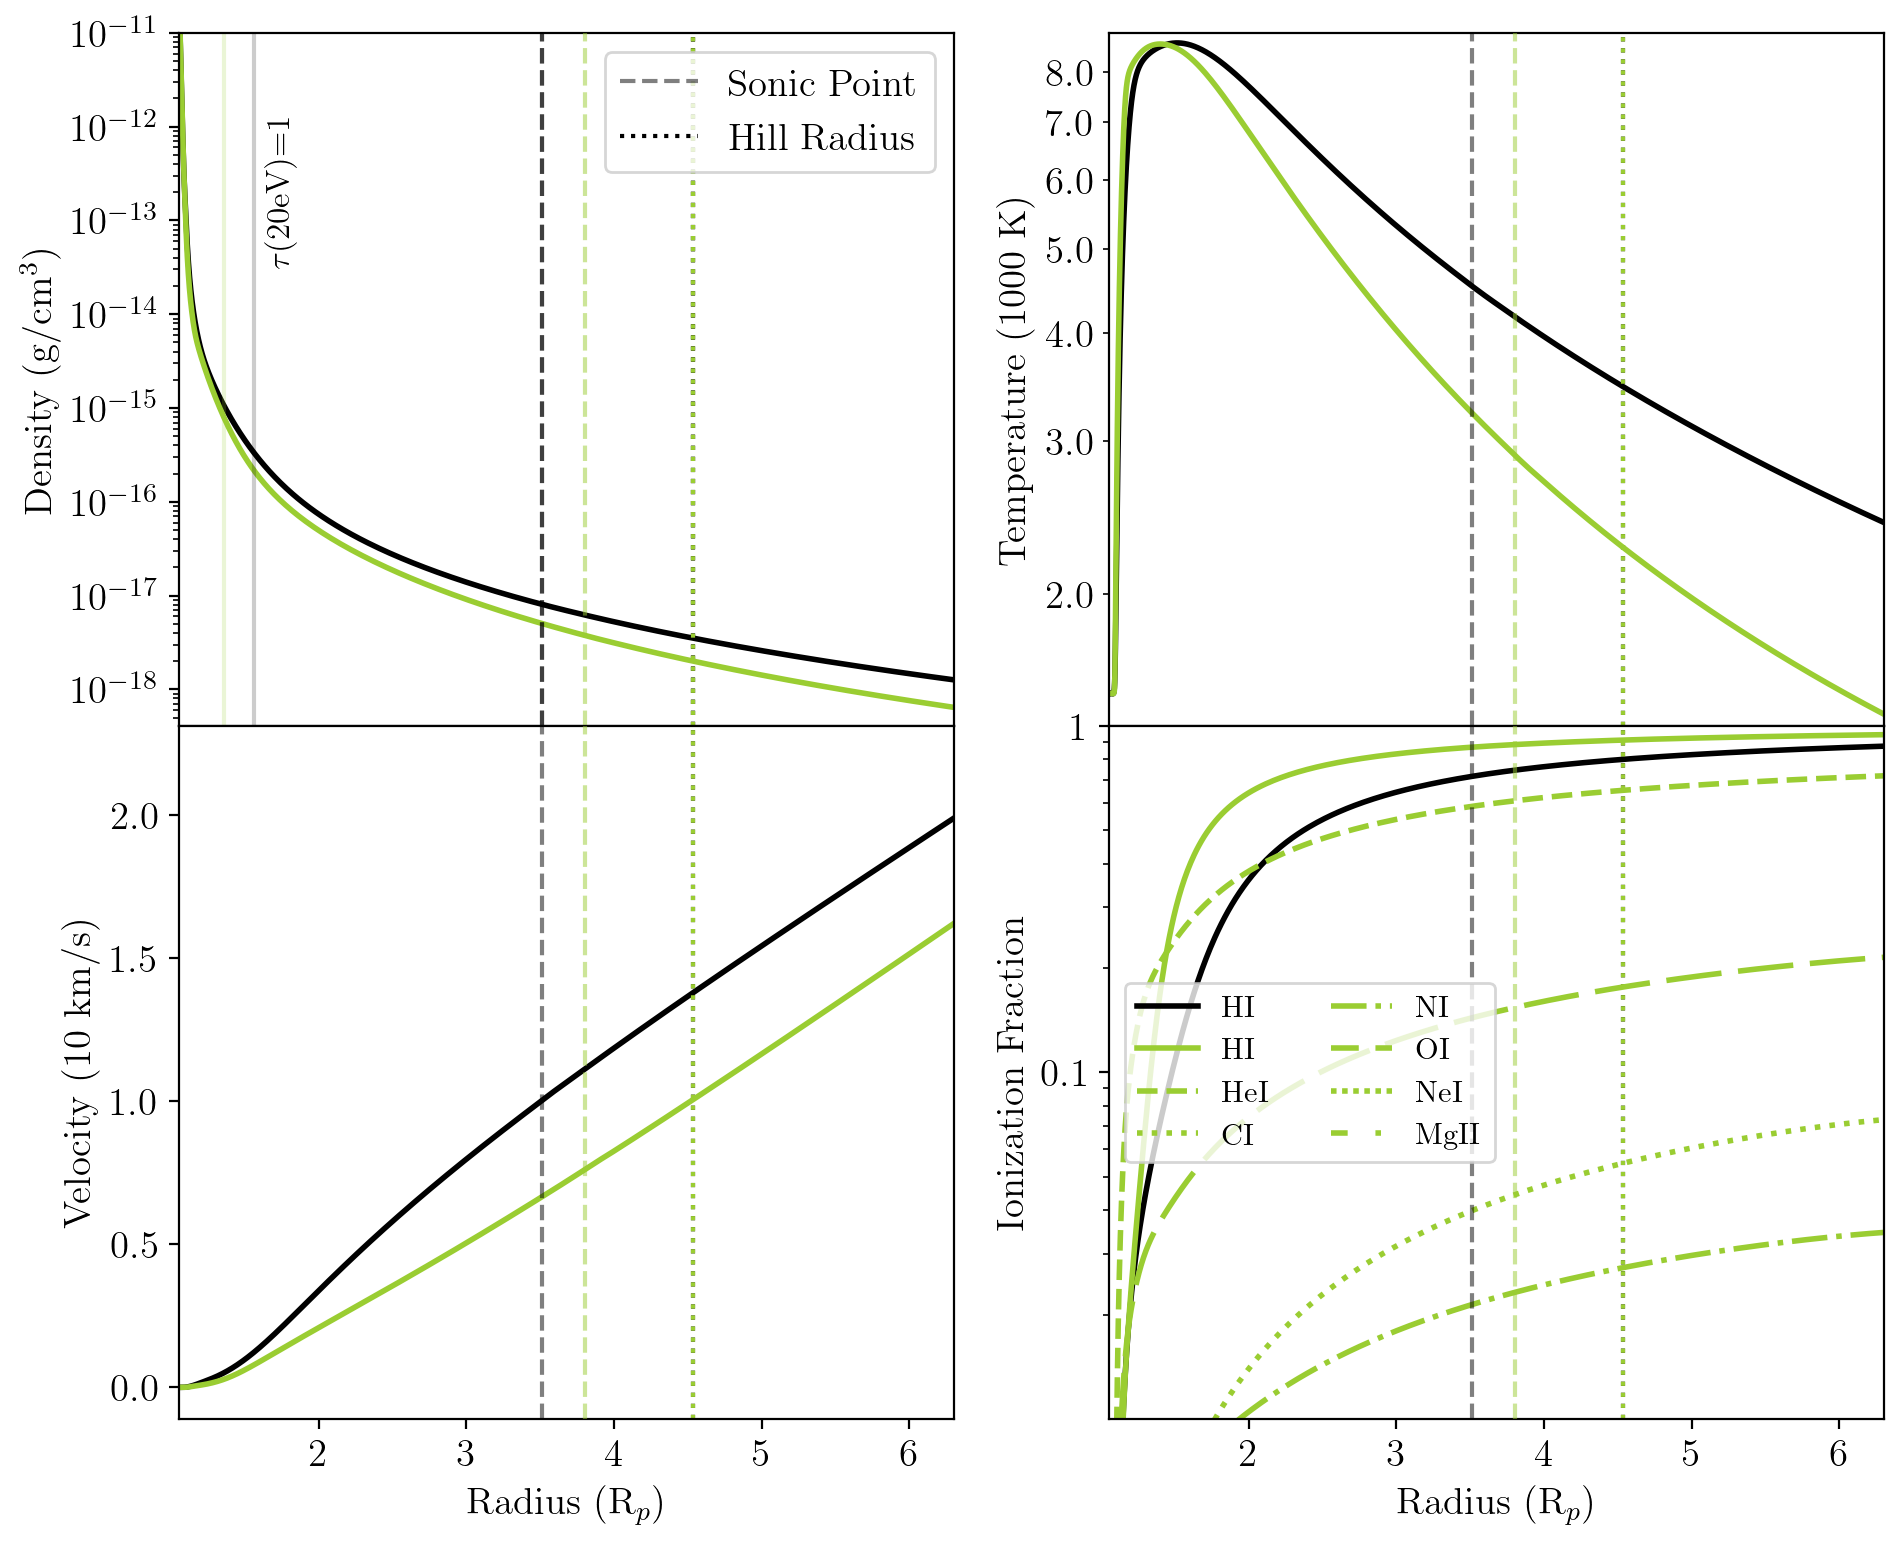

In [17]:
ax=quick_plot(simh.windsoln,shortlabel='Pure H',first_plotted=True)
quick_plot(sim.windsoln,first_plotted=False,ax=ax,line_color='yellowgreen',shortlabel='Solar Z')
ax[0,0].axvline(sim.windsoln.calc_tau1_radius(20)[0],c='yellowgreen',alpha=0.2)
ax[0,0].axvline(simh.windsoln.calc_tau1_radius(20)[0],c='k',alpha=0.2)
ax[0,0].text(1.8,3e-14,r'$\tau$(20eV)=1',fontsize=12,rotation=90,rotation_mode = 'anchor')
plt.show()